In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from data import Dataset

In [2]:
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

cfg = {'tfrecord_dir': os.path.join(module_path, 'data', 'tfrecords'),
       'img_dir': os.path.join(module_path, 'data', 'images'),
       'mask_dir': os.path.join(module_path, 'data', 'masks'),
       'depth_file': os.path.join(module_path, 'data', 'depths.csv'),
       'shuffle_buffer_size': 1024,
       'num_parallel_map_calls': 4,
       'prefetch_size': 64,
       'shuffle': True}

cfg = AttrDict(cfg)

Row 0 : Height = 230.00000417232513
Row 1 : Height = 282.00000524520874
Row 2 : Height = 331.0000002384186
Row 3 : Height = 273.00000190734863
Row 4 : Height = 449.0000009536743


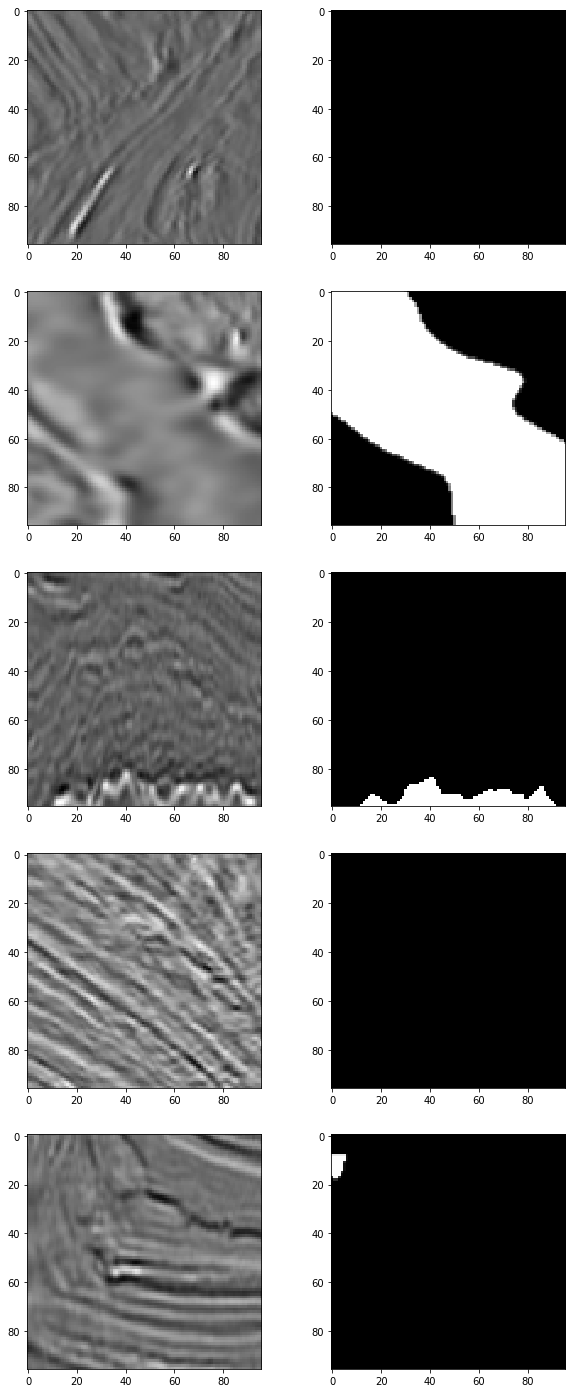

In [6]:
dataset = Dataset(cfg)
dataset = dataset.read_data()
iterator = dataset.make_initializable_iterator()
next_element = iterator.get_next()
n = 5
fig, ax = plt.subplots(n, 2, figsize=(10, 5*n))
with tf.Session() as sess:
    sess.run(iterator.initializer)
    for i in range(n):
        img, mask, height = sess.run(next_element)
        ax[i][0].imshow(np.squeeze(img / 255.))
        ax[i][1].imshow(np.squeeze(mask / 255.))
        print("Row {} : Height = {}".format(i, height * 1000))